In [1]:
# Đỗ Công Danh 19146163
# Khai báo và sử dụng các thư viện sau
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

169017344/169001437 [==============================] - 4s 0us/step


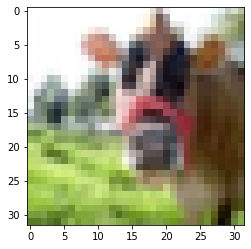

In [2]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 50000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
plt.imshow(x_train[0])
plt.show()

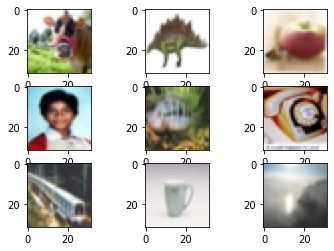

In [3]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
scaler=preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=np_utils.to_categorical(y_train,100)
y_test=np_utils.to_categorical(y_test,100)

In [9]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(3072,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 100)               12900     
                                                                 
Total params: 914,916
Trainable params: 914,916
Non-trai

In [10]:
# Biên dịch
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ dừng học ngay
history= model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
313/313 [==============================] - 11s 28ms/step - loss: 4.0191 - accuracy: 0.0944 - val_loss: 3.8161 - val_accuracy: 0.1145
Epoch 2/500
313/313 [==============================] - 9s 29ms/step - loss: 3.6023 - accuracy: 0.1549 - val_loss: 3.5801 - val_accuracy: 0.1613
Epoch 3/500
313/313 [==============================] - 8s 26ms/step - loss: 3.4059 - accuracy: 0.1883 - val_loss: 3.5584 - val_accuracy: 0.1685
Epoch 4/500
313/313 [==============================] - 8s 26ms/step - loss: 3.2567 - accuracy: 0.2142 - val_loss: 3.5064 - val_accuracy: 0.1793
Epoch 5/500
313/313 [==============================] - 8s 25ms/step - loss: 3.1328 - accuracy: 0.2362 - val_loss: 3.4696 - val_accuracy: 0.1918
Epoch 6/500
313/313 [==============================] - 8s 26ms/step - loss: 3.0142 - accuracy: 0.2572 - val_loss: 3.4472 - val_accuracy: 0.2004
Epoch 7/500
313/313 [==============================] - 8s 26ms/step - loss: 2.9080 - accuracy: 0.2744 - val_loss: 3.4584 - val_accuracy

In [13]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 5.220681667327881
Test Accuracy 0.19619999825954437


<function matplotlib.pyplot.show>

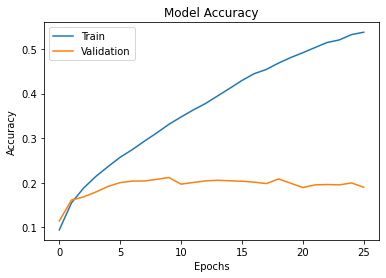

In [14]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show